In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

dw = pd.concat(map(pd.read_csv, ['/content/drive/MyDrive/Weather/2022/05.csv','/content/drive/MyDrive/Weather/2022/06.csv','/content/drive/MyDrive/Weather/2022/07.csv',
                  '/content/drive/MyDrive/Weather/2022/08.csv','/content/drive/MyDrive/Weather/2022/09.csv']))
dw['"monitordate"'] = pd.to_datetime(dw['"monitordate"'])
rh = dw[ (dw['"itemname"']== '相對濕度')].copy()
dw = dw[ (dw['"itemname"']== '溫度') ].copy()

cols_to_drop = ['"itemid"','"county"','"itemengname"','"itemunit"','"itemname"','"sitename"']
dw = dw.drop(columns=cols_to_drop, axis=1)
rh = rh.drop(columns=cols_to_drop, axis=1)
dw = dw.drop_duplicates(keep='last')
rh = rh.drop_duplicates(keep='last')
dw.sort_values([ '"monitordate"', '"siteid"'], axis=0,ascending=True, inplace=True)
rh.sort_values([ '"monitordate"', '"siteid"'], axis=0,ascending=True, inplace=True)

wea = pd.merge_asof(dw, rh, on='"monitordate"',by='"siteid"').copy()
wea.rename(columns={'"monitordate"':'"datacreationdate"','"concentration"_x':'"TEMP"','"concentration"_y':'"RH"'},inplace=True)

print(wea.shape)
#print(wea.isna().sum())
wea

(14268, 4)


,"""siteid""","""datacreationdate""","""TEMP""","""RH"""
0,43,2022-05-01 00:00:00,23.2,82
1,44,2022-05-01 00:00:00,22.7,79
2,45,2022-05-01 00:00:00,24.3,82
3,46,2022-05-01 00:00:00,24.9,81
4,43,2022-05-01 01:00:00,22.7,84
...,...,...,...,...
14263,46,2022-09-30 22:00:00,29.1,77
14264,43,2022-09-30 23:00:00,28,89
14265,44,2022-09-30 23:00:00,26.9,88
14266,45,2022-09-30 23:00:00,28.9,84


In [ ]:
import pandas as pd
import numpy as np

dt = pd.concat(map(pd.read_csv, ['/content/drive/MyDrive/AQI data/2022/05.csv', '/content/drive/MyDrive/AQI data/2022/06.csv', '/content/drive/MyDrive/AQI data/2022/07.csv','/content/drive/MyDrive/AQI data/2022/08.csv','/content/drive/MyDrive/AQI data/2022/09.csv']))


cols_to_drop = ['"sitename"', '"county"', '"status"','"pollutant"','"unit"','"so2_avg"','"pm10_avg"','"pm2.5_avg"','"co_8hr"','"o3_8hr"','"nox"','"no"','"windspeed"']
dt=dt.drop(columns=cols_to_drop, axis=1)
dt['"datacreationdate"'] = pd.to_datetime(dt['"datacreationdate"'])
dt

,"""aqi""","""so2""","""co""","""o3""","""pm10""","""pm2.5""","""no2""","""winddirec""","""datacreationdate""","""longitude""","""latitude""","""siteid"""
0,41.0,0.6,0.23,47.4,8.0,4.0,4.8,29,2022-05-01 00:00:00,121.088903,24.740644,23
1,48.0,1.7,0.21,43.3,16.0,13.0,7.3,44,2022-05-01 00:00:00,120.820200,24.565269,26
2,65.0,3.1,0.32,34.0,21.0,12.0,9.1,21,2022-05-01 00:00:00,120.409653,23.925175,35
3,38.0,0.9,0.27,44.6,12.0,6.0,11.2,32,2022-05-01 00:00:00,121.203986,24.952786,20
4,39.0,0.9,0.24,34.8,14.0,9.0,4.4,20,2022-05-01 00:00:00,120.758833,24.382942,27
...,...,...,...,...,...,...,...,...,...,...,...,...
61915,72.0,2.5,0.21,23.5,53.0,23.0,7.9,179,2022-09-30 23:00:00,120.544994,23.711853,37
61916,55.0,0.9,0.14,NaN,33.0,11.0,4.7,183,2022-09-30 23:00:00,120.348742,23.757547,38
61917,48.0,0.2,0.25,14.1,25.0,15.0,10.2,89,2022-09-30 23:00:00,121.383528,24.949028,311
61918,60.0,0.6,0.14,32.4,32.0,21.0,5.9,134,2022-09-30 23:00:00,120.183397,23.236881,312


In [ ]:
d = pd.merge_asof(wea, dt, on='"datacreationdate"',by='"siteid"').copy()

print(d.isna().sum())
d

"siteid"                0
"datacreationdate"      0
"TEMP"                  0
"RH"                    0
"aqi"                   2
"so2"                 306
"co"                  217
"o3"                  187
"pm10"                137
"pm2.5"               136
"no2"                 279
"winddirec"            34
"longitude"             0
"latitude"              0
dtype: int64


,"""siteid""","""datacreationdate""","""TEMP""","""RH""","""aqi""","""so2""","""co""","""o3""","""pm10""","""pm2.5""","""no2""","""winddirec""","""longitude""","""latitude"""
0,43,2022-05-01 00:00:00,23.2,82,67.0,2.0,0.43,26.6,42.0,27.0,13.2,353,120.317250,23.305633
1,44,2022-05-01 00:00:00,22.7,79,65.0,3.0,0.37,25.1,39.0,32.0,13.4,346,120.297142,23.115097
2,45,2022-05-01 00:00:00,24.3,82,58.0,2.0,0.36,29.8,39.0,22.0,9.8,332,120.217500,23.048197
3,46,2022-05-01 00:00:00,24.9,81,56.0,2.3,0.33,31.2,37.0,19.0,11.1,356,120.202617,22.984581
4,43,2022-05-01 01:00:00,22.7,84,71.0,3.0,0.55,22.9,41.0,30.0,14.1,12,120.317250,23.305633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14263,46,2022-09-30 22:00:00,29.1,77,51.0,0.6,0.43,44.5,32.0,14.0,11.1,82,120.202617,22.984581
14264,43,2022-09-30 23:00:00,28,89,51.0,0.8,0.18,40.9,39.0,17.0,6.2,87,120.317250,23.305633
14265,44,2022-09-30 23:00:00,26.9,88,61.0,0.7,0.14,28.8,33.0,23.0,7.3,84,120.297142,23.115097
14266,45,2022-09-30 23:00:00,28.9,84,53.0,0.9,0.22,38.8,36.0,21.0,3.1,357,120.217500,23.048197


In [ ]:

dfs = []

for i in [43,44,45,46]:#,203,312
  df = pd.DataFrame(d[(d['"siteid"'] == i)])
  df=df.replace(-1,np.nan)
  df=df.replace('x',np.nan)
  df.sort_values([ '"datacreationdate"'], axis=0,ascending=True, inplace=True)
  df = df.drop_duplicates(keep='last')
  df=df.ffill().bfill()
  df_date = df.set_index('"datacreationdate"')
  pdates = pd.date_range(start="2022-05-01", end="2022-10-01", freq='1H', closed='left')
  df_date = df_date[~df_date.index.duplicated(keep='last')]


  if pdates.difference(df_date.index).size > 0:
    print("測站{}-缺失值: {}".format(i,pdates.difference(df_date.index)))
    df_date_new = df_date.reindex(pdates,method='ffill')
    dfs.append(df_date_new)

  else:
    dfs.append(df_date)


data = pd.concat(dfs).sort_values(by=['"siteid"']).sort_index(kind='mergesort')
print(data.shape)
data
#data[data.isna().any(axis=1)]

測站43-缺失值: DatetimeIndex(['2022-07-01 03:00:00', '2022-07-15 15:00:00',
               '2022-07-15 16:00:00', '2022-07-15 17:00:00',
               '2022-07-15 18:00:00', '2022-07-15 19:00:00',
               '2022-07-15 20:00:00', '2022-07-15 21:00:00',
               '2022-07-15 22:00:00', '2022-08-13 18:00:00',
               '2022-08-16 05:00:00', '2022-08-16 06:00:00',
               '2022-08-16 07:00:00', '2022-08-29 23:00:00',
               '2022-08-30 00:00:00', '2022-08-30 01:00:00',
               '2022-08-30 02:00:00', '2022-08-30 03:00:00',
               '2022-08-30 04:00:00', '2022-08-30 05:00:00',
               '2022-08-30 20:00:00', '2022-09-12 09:00:00',
               '2022-09-29 10:00:00', '2022-09-29 11:00:00',
               '2022-09-29 21:00:00', '2022-09-30 02:00:00'],
              dtype='datetime64[ns]', freq=None)
測站44-缺失值: DatetimeIndex(['2022-05-29 07:00:00', '2022-05-29 08:00:00',
               '2022-05-29 09:00:00', '2022-05-29 10:00:00',
               

,"""siteid""","""TEMP""","""RH""","""aqi""","""so2""","""co""","""o3""","""pm10""","""pm2.5""","""no2""","""winddirec""","""longitude""","""latitude"""
2022-05-01 00:00:00,43,23.2,82,67.0,2.0,0.43,26.6,42.0,27.0,13.2,353,120.317250,23.305633
2022-05-01 00:00:00,44,22.7,79,65.0,3.0,0.37,25.1,39.0,32.0,13.4,346,120.297142,23.115097
2022-05-01 00:00:00,45,24.3,82,58.0,2.0,0.36,29.8,39.0,22.0,9.8,332,120.217500,23.048197
2022-05-01 00:00:00,46,24.9,81,56.0,2.3,0.33,31.2,37.0,19.0,11.1,356,120.202617,22.984581
2022-05-01 01:00:00,43,22.7,84,71.0,3.0,0.55,22.9,41.0,30.0,14.1,12,120.317250,23.305633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 22:00:00,46,29.1,77,51.0,0.6,0.43,44.5,32.0,14.0,11.1,82,120.202617,22.984581
2022-09-30 23:00:00,43,28,89,51.0,0.8,0.18,40.9,39.0,17.0,6.2,87,120.317250,23.305633
2022-09-30 23:00:00,44,26.9,88,61.0,0.7,0.14,28.8,33.0,23.0,7.3,84,120.297142,23.115097
2022-09-30 23:00:00,45,28.9,84,53.0,0.9,0.22,38.8,36.0,21.0,3.1,357,120.217500,23.048197


In [ ]:
import numpy as np
k=0
site_num=4
node=[]
AQI=[]
while k <= data.shape[0]-site_num:
  hour=[]
  aqi=[]
  for (a,b,c,d,e,f,g,h,i,j) in zip(data['"aqi"'][k:k+site_num],data['"pm2.5"'][k:k+site_num],data['"pm10"'][k:k+site_num],
                data['"o3"'][k:k+site_num],data['"no2"'][k:k+site_num],data['"so2"'][k:k+site_num],
                data['"co"'][k:k+site_num],data['"TEMP"'][k:k+site_num],data['"RH"'][k:k+site_num],data['"winddirec"'][k:k+site_num]):
    hour.append([a,b,c,d,e,f,g,h,i,j])
    aqi.append(a)

  k=k+site_num
  node.append(hour)
  AQI.append(aqi)

feature = np.array(node).astype(float)#.transpose(1, 2, 0)
AQI = np.array(AQI)

print(AQI.shape)
print(feature.shape)
feature

(3672, 4)
(3672, 4, 10)


array([[[ 67. ,  27. ,  42. , ...,  23.2,  82. , 353. ],
        [ 65. ,  32. ,  39. , ...,  22.7,  79. , 346. ],
        [ 58. ,  22. ,  39. , ...,  24.3,  82. , 332. ],
        [ 56. ,  19. ,  37. , ...,  24.9,  81. , 356. ]],

       [[ 71. ,  30. ,  41. , ...,  22.7,  84. ,  12. ],
        [ 68. ,  25. ,  42. , ...,  22.3,  79. , 354. ],
        [ 62. ,  26. ,  39. , ...,  23.9,  83. , 331. ],
        [ 61. ,  28. ,  40. , ...,  24.4,  82. , 355. ]],

       [[ 73. ,  27. ,  41. , ...,  22.5,  85. ,   8. ],
        [ 69. ,  20. ,  38. , ...,  22.1,  81. ,  15. ],
        [ 61. ,  17. ,  37. , ...,  23.7,  84. ,  18. ],
        [ 63. ,  23. ,  40. , ...,  24.1,  84. ,  35. ]],

       ...,

       [[ 45. ,  17. ,  40. , ...,  28.8,  85. , 351. ],
        [ 53. ,  22. ,  31. , ...,  28.1,  80. , 296. ],
        [ 52. ,  19. ,  31. , ...,  29.2,  83. , 332. ],
        [ 52. ,  15. ,  26. , ...,  29.2,  75. ,  24. ]],

       [[ 49. ,  21. ,  33. , ...,  28.8,  85. ,   9. ],
        [ 

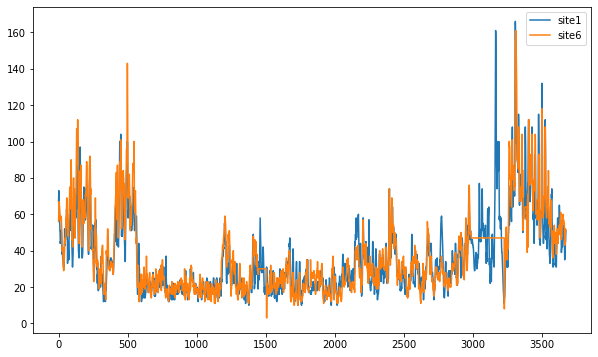

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
plt.figure(figsize=(10, 6))
plt.plot(AQI[:, [0, -1]])
plt.legend(["site1", "site6"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#siteid
values = [ x[2] for x in feature]
print(len(values))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)
scaled_dataset

3672


array([[0.32051282, 0.48888889, 0.17619048, ..., 0.35751295, 0.7       ,
        0.92222222],
       [0.34615385, 0.57777778, 0.17619048, ..., 0.33678756, 0.71666667,
        0.91944444],
       [0.33974359, 0.37777778, 0.16666667, ..., 0.32642487, 0.73333333,
        0.05      ],
       ...,
       [0.28205128, 0.42222222, 0.13809524, ..., 0.61139896, 0.71666667,
        0.92222222],
       [0.28846154, 0.42222222, 0.1       , ..., 0.59585492, 0.73333333,
        0.025     ],
       [0.28846154, 0.46666667, 0.16190476, ..., 0.59585492, 0.73333333,
        0.99166667]])

In [ ]:
#Creating a window for previous data
def to_supervised(train):
    window_size = 4
    X = []
    Y = []
    for i in range(window_size, len(train)-2):
        X.append(train[i-window_size:i,:])
        Y.append(train[i+2,0:1])

    return X,Y

X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('X' ,X.shape)
print('Y' ,Y.shape)
print(X)
print(Y)

X (3666, 4, 10)
Y (3666, 1)
[[[0.32051282 0.48888889 0.17619048 ... 0.35751295 0.7        0.92222222]
  [0.34615385 0.57777778 0.17619048 ... 0.33678756 0.71666667 0.91944444]
  [0.33974359 0.37777778 0.16666667 ... 0.32642487 0.73333333 0.05      ]
  [0.34615385 0.48888889 0.18095238 ... 0.30569948 0.75       0.92777778]]

 [[0.34615385 0.57777778 0.17619048 ... 0.33678756 0.71666667 0.91944444]
  [0.33974359 0.37777778 0.16666667 ... 0.32642487 0.73333333 0.05      ]
  [0.34615385 0.48888889 0.18095238 ... 0.30569948 0.75       0.92777778]
  [0.35897436 0.53333333 0.15238095 ... 0.29015544 0.75       0.94722222]]

 [[0.33974359 0.37777778 0.16666667 ... 0.32642487 0.73333333 0.05      ]
  [0.34615385 0.48888889 0.18095238 ... 0.30569948 0.75       0.92777778]
  [0.35897436 0.53333333 0.15238095 ... 0.29015544 0.75       0.94722222]
  [0.34615385 0.42222222 0.15238095 ... 0.2746114  0.75       0.00277778]]

 ...

 [[0.20512821 0.13333333 0.0952381  ... 0.80829016 0.25       0.85555556

In [ ]:
#Splitting the dataset
print(X.shape[0])
n_train = int(X.shape[0]*0.8)
n_test = int((X.shape[0]-n_train)*0.5)

X_train, X_valid, X_test = X[:n_train,] , X[n_train:n_train+n_test,], X[n_train+n_test:,]
print('X_train' ,X_train.shape)
print('X_valid' ,X_valid.shape)
print('X_test' ,X_test.shape)

Y_train, Y_valid, Y_test = Y[:n_train,] , Y[n_train:n_train+n_test,], Y[n_train+n_test:,]
print('Y_train' ,Y_train.shape)
print('Y_valid' ,Y_valid.shape)
print('Y_test' ,Y_test.shape)

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
print('n_timesteps: {}, features: {}, n_outputs: {}'.format(n_timesteps,n_features,n_outputs))

3666
X_train (2932, 4, 10)
X_valid (367, 4, 10)
X_test (367, 4, 10)
Y_train (2932, 1)
Y_valid (367, 1)
Y_test (367, 1)
n_timesteps: 4, features: 10, n_outputs: 1


# Model

## LSTM

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 64)                19200     
                                                                 
 dense_21 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,265
Trainable params: 19,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
92/92 - 3s - loss: 0.0306 - val_loss: 0.0492 - 3s/epoch - 34ms/step
Epoch 2/100
92/92 - 1s - loss: 0.0058 - val_loss: 0.0206 - 696ms/epoch - 8ms/step
Epoch 3/100
92/92 - 1s - loss: 0.0034 - val_loss: 0.0133 - 693ms/epoch - 8ms/step
Epoch 4/100
92/92 - 1s - loss: 0.0022 - val_loss: 0.0094 - 721ms/epoch - 8ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0018 - val_loss: 0.0078 - 484ms/epoch - 5ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0017

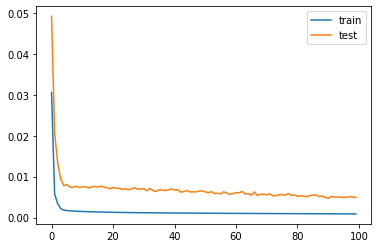

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
from matplotlib import pyplot
from tensorflow import keras

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'mean_squared_error')
model.summary()

history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=100, verbose=2)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## GRU

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                7950      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
128/128 - 3s - loss: 0.0206 - val_loss: 0.0022 - 3s/epoch - 22ms/step
Epoch 2/100
128/128 - 1s - loss: 0.0021 - val_loss: 0.0019 - 679ms/epoch - 5ms/step
Epoch 3/100
128/128 - 1s - loss: 0.0018 - val_loss: 0.0016 - 593ms/epoch - 5ms/step
Epoch 4/100
128/128 - 1s - loss: 0.0015 - val_loss: 0.0015 - 607ms/epoch - 5ms/step
Epoch 5/100
128/128 - 1s - loss: 0.0012 - val_loss: 9.9983e-04 - 728ms/epoch - 6ms/step
Epoch 6/100
128/128 - 1s -

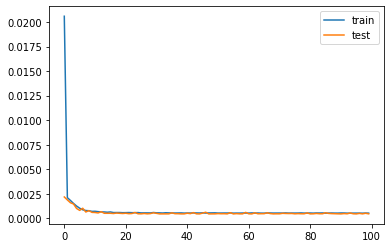

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from matplotlib import pyplot

model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=100, verbose=2)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Evaluation

In [ ]:
#Taking predictions
Y_pred = model.predict(X_test)
print(Y_pred.shape)

12/12 [==============================] - 0s 3ms/step
(367, 1)


In [ ]:
#Scaling back to the original scale
d = scaled_dataset[-Y_pred.shape[0]:,:]
#print('dummy',d)
#print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:Y_pred.shape[0],1:]), axis =1)
print('concat y_pred',Y_predicted.shape)
Y_tested = np.concatenate((Y_test, d[:Y_pred.shape[0],1:]), axis = 1)
print('concat Y_test', Y_tested.shape)

concat y_pred (367, 10)
concat Y_test (367, 10)


In [ ]:
#Take inverse transform
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
#print(Y_predicted)
#print(Y_tested)
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (367, 1)
Y_predicted (367, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true +=  1e-18 #avoid division by zeros
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('RMSE: ', np.sqrt(mean_squared_error(Y_tested.flatten(), Y_predicted.flatten())))
print('MAE: ', mean_absolute_error(Y_tested.flatten(), Y_predicted.flatten()))
print('MAPE: ', mean_absolute_percentage_error(Y_tested.flatten(), Y_predicted.flatten()), "%")

RMSE:  10.937152255912123
MAE:  7.471663018338362
MAPE:  10.401525198280332 %


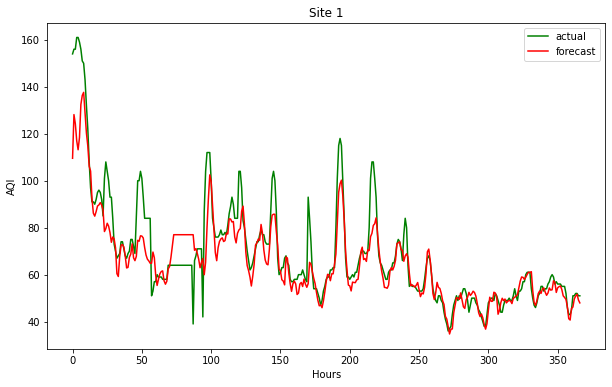

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Site 1")
plt.xlabel("Hours")
plt.ylabel("AQI")
plt.plot(Y_tested[:,:], color= 'green')
plt.plot(Y_predicted[:,:], color= 'red')
plt.legend(["actual", "forecast"])